### Hiệp phương sai và hệ số tương quan

In [1]:
import numpy as np

In [3]:
x = np.array([0,1])
y = np.array([0,1,2])
jpmf = np.array([[0.38, 0.17], [0.14,0.02], [0.24, 0.05]])

In [4]:
#Hàm trọng số
pmfx = [ jpmf[:,i].sum() for i in x ]
pmfy = [jpmf[j,:].sum() for j in y]

In [6]:
EX = np.sum(x*pmfx)
EY = np.sum(y*pmfy)

In [9]:
VarX = np.sum((x-EX)**2 *pmfx)
VarY = np.sum((y-EY)**2 * pmfy)

In [11]:
EXY = 0 #ham tuong quan
for i in x:
    for j in y:
        EXY = EXY+i+j+jpmf[j,i]
cov = EXY - EX + EY

### Ví dụ mô phỏng biến ngẫu nhiên theo luật phân phối chuẩn  2 chiều

In [14]:
import seaborn as sns
mean =  [165,55]
cov = [[81, 0.6], [0.6, 36]]

C:\Users\hoangnx8\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


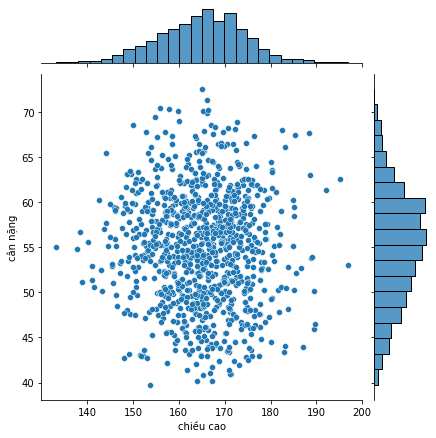

In [19]:
chieu_cao, can_nang = np.random.multivariate_normal(mean, cov, 1000).T
sns.jointplot(chieu_cao, can_nang).set_axis_labels('chiều cao', 'cân nặng')

### Bài tập thực hành 1
- Tung hai con xúc sắc cân đối, đồng chất gọi X, Y lần lượt là số chấm xuất hiện trên mặt của con xúc sắc thứ thứ 1 và thứ hai.

- Tìm hàm phân phối biên của X, Y

- Tìm kỳ vọng, phương sai của X, Y

- Tìm cov(X, Y ), hệ số tương quan

- Tìm ma trận hiệp phương sai của (X, Y )


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Hàm phân phối biên của X:
$$ P(X=x_{i}) = \sum_{j=1}^6 P(X=x_{i}, Y=j) = \sum_{j=1}^6 p_{ij} = \frac{1}{36} * 6 = \frac{1}{6} $$
Hàm phân phối biên của Y:
$$ P(Y=y_{j}) = \sum_{i=1}^6 P(X=x_{i}, Y=j) = \sum_{i=1}^6 p_{ij} = \frac{1}{36} * 6 = \frac{1}{6} $$

Kỳ vọng của X:
$$ E(X) = \sum_{i=1}^6 x_{i}P(X=x_{i}) = 1*\frac16 + 2*\frac16 + 3*\frac16 + 4*\frac16 + 5*\frac16 + 6*\frac16 = 3.5$$
Kỳ vọng của Y:
$$ E(Y) = \sum_{j=1}^6 y_{j}P(Y=y_{j}) = 1*\frac16 + 2*\frac16 + 3*\frac16 + 4*\frac16 + 5*\frac16 + 6*\frac16 = 3.5$$

Phương sai của X:
$$ E(X^2) = \sum_{i=1}^6 x_{i}^2P(X=x_{i}) = 1*\frac16 + 4*\frac16 + 9*\frac16 + 16*\frac16 + 25*\frac16 + 36*\frac16 = $$
$$ Var(X) = E(X^{2}) - E(X)^2 $$
Phương sai của Y:
$$ Var(Y) = E(Y^2) - E(Y)^2 = Var(X)$$

Hiệp phương sai: 
$$ COV(X,Y) = E(XY) - EX*EY $$

In [23]:

EX = (1+2+3+4+5+6) * 1/6
EY = EX
print("Kỳ vọng của X:", EX)
print("Kỳ vọng của Y:", EY)

E_X_binh = (np.arange(1,7)**2 * 1/6).sum()
E_Y_binh = E_X_binh

VarX = E_X_binh  - EX**2
VarY = E_Y_binh - EY**2
print("Phương sai của X:", np.round(VarX,2))
print("Phương sai của Y:", np.round(VarY,2))

EXY = 0
for i in range(1,7):
    for j in range(1,7):
        EXY += i*j*1/36

CovXY = EXY - EX*EY

correlation_coefficient = CovXY/(np.sqrt(VarX) * np.sqrt(VarY))

print("\nCov(X,Y) =", np.round(CovXY, 10))
print("Do X,Y độc lập nên Cov(X,Y) = 0")
print("Hệ số tương quan của X,Y:", np.round(correlation_coefficient, 10))

covariance_matrix = np.array([[VarX, CovXY], [CovXY, VarY]], dtype=float)
print("\nMa trận hiệp phương sai:")
print(np.round(covariance_matrix, 5))

Kỳ vọng của X: 3.5
Kỳ vọng của Y: 3.5
Phương sai của X: 2.92
Phương sai của Y: 2.92

Cov(X,Y) = 0.0
Do X,Y độc lập nên Cov(X,Y) = 0
Hệ số tương quan của X,Y: 0.0

Ma trận hiệp phương sai:
[[2.91667 0.     ]
 [0.      2.91667]]


### Bài tập thực hành 2

- Cho hai biến ngẫu nhiên tuân theo luật phân phối chuẩn độc lập với nhau có kỳ vọng lần lượt là 1, 2 và phương sai là 25, 9.

- Tìm ma trận hiệp phương sai

- Biểu diễn véc tơ kỳ vọng, ma trận hiệp phương sai qua python

- Dùng lệnh np.random.multivariate_normal() để tạo ra 5000 giá trị

- Vẽ đồ thị các giá trị đồng thời mà (X, Y ) có thể nhận và phân phối biên trong cùng một đồ thị.


In [24]:
EX, VarX, EY, VarY = 1,2,25,9

In [27]:
#Vi X va Y doc lap voi nhau nen Cov(X,Y) = 0
E = np.array([EX, EY])
covariance_matrix = np.array([[VarX, 0], [0, VarY]])
print('Expectation Vector: ', E)
print('Covariance Matrix: \n', covariance_matrix)

Expectation Vector:  [ 1 25]
Covariance Matrix: 
 [[2 0]
 [0 9]]


C:\Users\hoangnx8\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


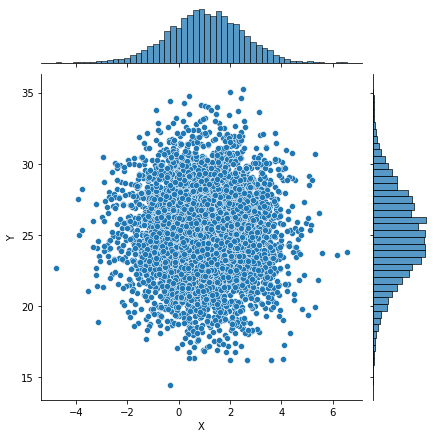

In [29]:
X_random,Y_random = np.random.multivariate_normal(E,covariance_matrix, 5000 ).T
sns.jointplot(X_random, Y_random).set_axis_labels("X","Y")